# Decomposition of the Hopfield Network created by the MRP
GOAL: understand what going on step by step

## 1. Modules needed

In [269]:
# Hopfield v2 -> all even modules

############################### DEPENDENCIES ##################################
import json
import os
import sys
import contextlib
import io
import numpy as np
import inspect
import os.path
import matplotlib.pyplot as plt
from math import pi, atan, sin, sqrt, tanh, cosh, exp, ceil
import seaborn as sns
from numpy.core.fromnumeric import shape
import random
import time
import math
from pathlib import Path

## 2. File path

In [270]:
filename = inspect.getframeinfo(inspect.currentframe()).filename
file_path = os.path.dirname(os.path.abspath(filename))
project_root = os.path.dirname(file_path)

if project_root not in sys.path:
    sys.path.append(project_root)

from event_model import event_model as em
from validator import validator_lite as vl
import data_analysis.event_generator as eg
from visual.color_map import Colormap

print(project_root)

c:\Users\aurel\Documents\GitHub\Code_Thesis_GitHub\Code_Thesis_GitHub


## 3. Context manager and helper

In [271]:
########################### CONTEXTS ##################################
@contextlib.contextmanager
def nostdout():
    save_stdout = sys.stdout
    sys.stdout = io.BytesIO()
    yield
    sys.stdout = save_stdout

In [272]:
########################### HELPER FUNCTIONS ##################################
def get_polar_coordinates(x, y):
    r = math.sqrt(x ** 2 + y ** 2)
    phi = math.atan2(x, y)
    if phi < 0:
        phi = math.pi - phi
    return r, phi

## 4. Functions about the events (dealing with the data/preparing them)

Fonctions "imbriquées" 

---------- 1 -----------

> run "save_experiment" fct
>> run "evaluate_events" fct
>>> run "load_events" fct
>>> run "Hopfield" class (twice: even and odd, then group results)

---------- 2 -----------
> "prepare_instance" fct: looks like it could be used to test the network (and create kind of false generated instance) but not use in the rest of the code (only at the very very end but not necesseraly used), so I'll not used it here
> "load_instance" fct : same

### Test of the load_event fct

In [273]:
def load_event(file_name, plot_event=False):
# NB: some modifications might have been done for a better understanding
    f = open(file_name)
    json_data_event = json.loads(f.read())

    ev = em.event(json_data_event, read_tracks=True)

    modules = ev.modules
    tracks = ev.real_tracks

    if plot_event:
        eg.plot_tracks_and_modules(tracks, modules, title="Loaded Event")

    modules_even = []
    modules_odd = []

    for i in range(len(modules)):
        if i % 2 == 0:
            modules_even.append(modules[i])
        else:
            modules_odd.append(modules[i])

    return json_data_event, modules_even, modules_odd, tracks, modules

In [274]:
i = 2
event_file_name = "/datasets/minibias/velo_event_"
file_name = project_root + event_file_name
print(file_name)

c:\Users\aurel\Documents\GitHub\Code_Thesis_GitHub\Code_Thesis_GitHub/datasets/minibias/velo_event_


In [275]:
json_data_event, modules_even, modules_odd, tracks, modules = load_event(file_name + str(i) + ".json", plot_event=False)

In [276]:
# About tracks 
print(tracks[0])
print(len(tracks))
print(tracks[1].hits)


Track with 15 hits: [#15 module 23 {1.69, 6.806, 99.419}, #21 module 25 {1.962, 8.012, 124.419}, #27 module 27 {2.273, 9.178, 149.419}, #35 module 29 {2.565, 10.326, 174.419}, #43 module 31 {2.818, 11.512, 199.419}, #52 module 33 {3.129, 12.678, 224.419}, #63 module 35 {3.401, 13.884, 249.419}, #72 module 37 {3.712, 15.051, 274.419}, #79 module 39 {4.296, 17.423, 324.419}, #89 module 41 {5.151, 21.001, 399.419}, #99 module 43 {6.311, 25.753, 500.581}, #107 module 45 {7.439, 30.459, 600.581}, #115 module 47 {7.983, 32.792, 650.581}, #124 module 49 {8.567, 35.164, 700.581}, #132 module 51 {9.111, 37.498, 750.581}]
13
[#30 module 28 {-2.974, 4.354, 163.081}, #39 module 30 {-3.305, 4.879, 188.081}, #48 module 32 {-3.655, 5.385, 213.081}, #57 module 34 {-3.966, 5.929, 238.081}, #67 module 36 {-4.277, 6.396, 263.081}, #77 module 38 {-4.938, 7.446, 313.081}, #86 module 40 {-5.872, 9.001, 388.081}, #94 module 42 {-7.116, 11.102, 488.081}, #103 module 44 {-8.497, 13.221, 588.081}, #110 module 4

In [277]:
# About modules 
print(modules[0])
print('\n' )
print(modules[46].hits())

module 0:
 At z: set()
 Number of hits: 0
 Hits (#id {x, y, z}): []


[#109 module 46 {-6.181, -16.041, 636.919}, #110 module 46 {-9.197, 14.271, 638.081}, #111 module 46 {-16.197, 3.887, 638.081}, #112 module 46 {-16.343, 3.625, 638.081}]


ValueError: min() arg is an empty sequence

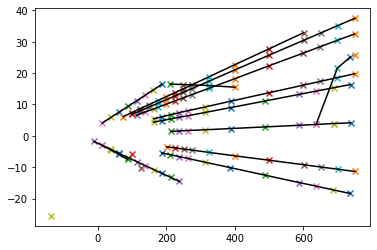

In [280]:
#With visualisation
json_data_event, modules_even, modules_odd, tracks, modules = load_event(file_name + str(i) + ".json", plot_event=True)

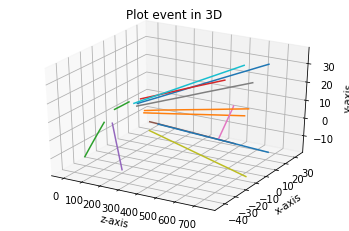

In [ ]:
def plot_tracks3D(tracks, title=None):
    ax = plt.axes(projection ='3d')
    [
        ax.plot3D(
            [hit.z for hit in track.hits], 
            [hit.x for hit in track.hits],
            [hit.y for hit in track.hits],
        )
        for track in tracks
    ]
    if title:
        plt.title(title)
    ax.set_xlabel('z-axis')
    ax.set_ylabel('x-axis')
    ax.set_zlabel('y-axis');
    plt.show()

plot_tracks3D(tracks, title='Plot event in 3D')

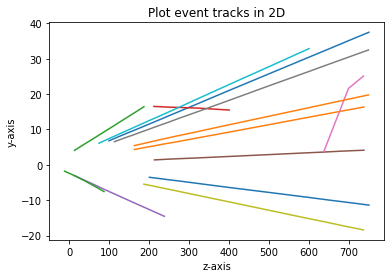

In [ ]:
#Fct to plot track on y and z axis 
def plot_tracks(tracks, title=None):
    [
        plt.plot(
            [hit.z for hit in track.hits], 
            [hit.y for hit in track.hits], 
        )
        for track in tracks
    ]
    if title:
        plt.title(title)
    plt.xlabel('z-axis')
    plt.ylabel('y-axis')
    plt.show()

    
plot_tracks(tracks, title='Plot event tracks in 2D')

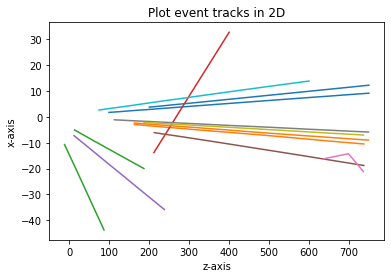

In [ ]:
def plot_tracks(tracks, title=None):
    [
        plt.plot(
            [hit.z for hit in track.hits], 
            [hit.x for hit in track.hits], 
        )
        for track in tracks
    ]
    if title:
        plt.title(title)
    plt.xlabel('z-axis')
    plt.ylabel('x-axis')
    plt.show()

    
plot_tracks(tracks, title='Plot event tracks in 2D')

In [295]:
for module in modules:
        if module.hits() == []:
            modules.remove(module)
        else:
            min_y = [min(module.hits(), key=lambda hit: hit.y).y for module in modules]
            max_y = [max(module.hits(), key=lambda hit: hit.y).y for module in modules]
min_y = min(min_y)
max_y = max(max_y)

print(min_y)
print(max_y)

-25.55
37.498


ValueError: min() arg is an empty sequence

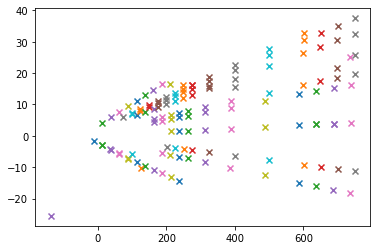

In [282]:
#Fct to plot the modules in 2D
def plot_modules(modules, title=None):
    [
        plt.scatter(
            [hit.z for hit in module.hits()],
            [hit.y for hit in module.hits()],
            marker="x",
        )
        for module in modules
    ]

    #min_y = min([min(module.hits(), key=lambda hit: hit.y).y for module in modules])
    #max_y = max([max(module.hits(), key=lambda hit: hit.y).y for module in modules])

    for module in modules:
        if module.hits() == []:
            modules.remove(module)
        else:
            min_y = [min(module.hits(), key=lambda hit: hit.y).y for module in modules]
            max_y = [max(module.hits(), key=lambda hit: hit.y).y for module in modules]
    min_y = min(min_y)
    max_y = max(max_y)

    [
        plt.plot(
            [sum([hit.z for hit in module.hits()]) / len(module.hits())] * 2,
            [min_y, max_y],
        )
        for module in modules
    ]
    if title:
        plt.title(title)
    plt.xlabel('z-axis')
    plt.ylabel('y-axis')
    plt.show()

plot_modules(modules, title='Plot event hits by modules in 2D')

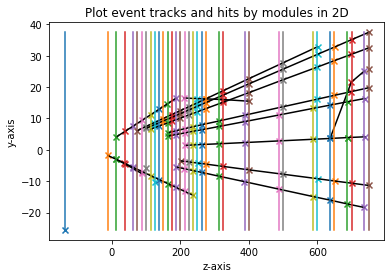

In [ ]:
# Fct to plot the modules, the hits and the tracks
def plot_tracks_and_modules(tracks, modules, colors=None, title=None):
    if not colors:
        [
            plt.plot(
                [hit.z for hit in track.hits],
                [hit.y for hit in track.hits],
                color="black",
            )
            for track in tracks
        ]
    else:
        current_color = 0
        for i, track in enumerate(tracks):
            for j in range(len(track.hits) - 1):
                plt.plot(
                    [track.hits[j].z, track.hits[j + 1].z],
                    [track.hits[j].y, track.hits[j + 1].y],
                    color=colors[current_color],
                )
                current_color += 1
    plot_modules(modules, title)

plot_tracks_and_modules(tracks, modules,title='Plot event tracks and hits by modules in 2D')